#  Forbes World's Richest

https://www.forbes.com/real-time-billionaires/#736cab523d78

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

import requests

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
# year data to fetch
year = 2022

url = 'http://www.forbes.com/ajax/list/data'

parameter = {'type': 'person', 'year': year, 'uri': 'billionaires'}

r = requests.get(url=url, params=parameter)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: application/json;charset=UTF-8 -- Encoding: UTF-8


# Append Data

In [4]:
name = []
source = []
industry = []
country = []
realtimeworth = []
realtimerank = []


for i in range(100):
  name.append(r.json()[i]['name'])
  source.append(r.json()[i]['source'])
  industry.append(r.json()[i]['industry'])
  country.append(r.json()[i]['country'])
  realtimeworth.append(r.json()[i]['realTimeWorth'])
  realtimerank.append(r.json()[i]['realTimeRank'])

# Create Dataframe

In [5]:
data = {
  'Name': name,
  'Source': source,
  'Industry': industry,
  'Country': country,
  'RealTimeWorth': realtimeworth,
  'RealTimeRank': realtimerank
}

df = pd.DataFrame(data=data)

# Head and Tail

In [6]:
df

,Name,Source,Industry,Country,RealTimeWorth,RealTimeRank
0,Albert Avdolyan,"oil, mining",Energy,Russia,1253.817,2182
1,Alexander Dzhaparidze,oil services,Energy,Russia,1204.038,2248
2,Alexander Klyachin,real estate,Real Estate,Russia,1515.954,1874
3,Alexandr Wang,artificial intelligence,Technology,United States,1000.000,2522
4,Anatoly Sedykh,steel pipes,Metals & Mining,Russia,1923.943,1547
...,...,...,...,...,...,...
95,Stephen Schwarzman,investments,Finance & Investments,United States,29475.765,39
96,Lee Shau Kee,real estate,Real Estate,Hong Kong,31593.516,38
97,Len Blavatnik,"music, chemicals",Diversified,United States,27562.582,46
98,Jacqueline Mars,"candy, pet food",Food & Beverage,United States,31840.287,35


In [7]:
df.shape

(100, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           100 non-null    object 
 1   Source         100 non-null    object 
 2   Industry       100 non-null    object 
 3   Country        100 non-null    object 
 4   RealTimeWorth  100 non-null    float64
 5   RealTimeRank   100 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [9]:
df['RealTimeRank'] = df['RealTimeRank'].astype('category')                      # change RealTimeRank data type to categorical                
df['RealTimeRank'].dtypes

CategoricalDtype(categories=[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
                    11,   12,   13,   14,   15,   16,   18,   19,   20,   21,
                    22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
                    32,   33,   34,   35,   37,   38,   39,   42,   46,   93,
                   632,  749,  874, 1116, 1154, 1356, 1378, 1444, 1547, 1615,
                  1617, 1626, 1641, 1766, 1874, 1967, 2019, 2026, 2037, 2057,
                  2062, 2063, 2068, 2086, 2111, 2115, 2120, 2160, 2182, 2210,
                  2211, 2215, 2248, 2252, 2264, 2299, 2336, 2342, 2345, 2379,
                  2404, 2409, 2412, 2425, 2430, 2442, 2450, 2457, 2461, 2463,
                  2474, 2486, 2488, 2492, 2501, 2517, 2519, 2522],
, ordered=False)

In [10]:
df.describe(include='object')

,Name,Source,Industry,Country
count,100,100,100,100
unique,100,75,17,15
top,Albert Avdolyan,real estate,Fashion & Retail,United States
freq,1,6,17,26


In [11]:
df['Industry'].value_counts()

Fashion & Retail              17
Technology                    13
Diversified                   12
Food & Beverage                9
Finance & Investments          8
Manufacturing                  6
Energy                         5
Media & Entertainment          5
Healthcare                     5
Real Estate                    5
Metals & Mining                3
Automotive                     3
Logistics                      3
Construction & Engineering     2
Service                        2
Sports                         1
Telecom                        1
Name: Industry, dtype: int64

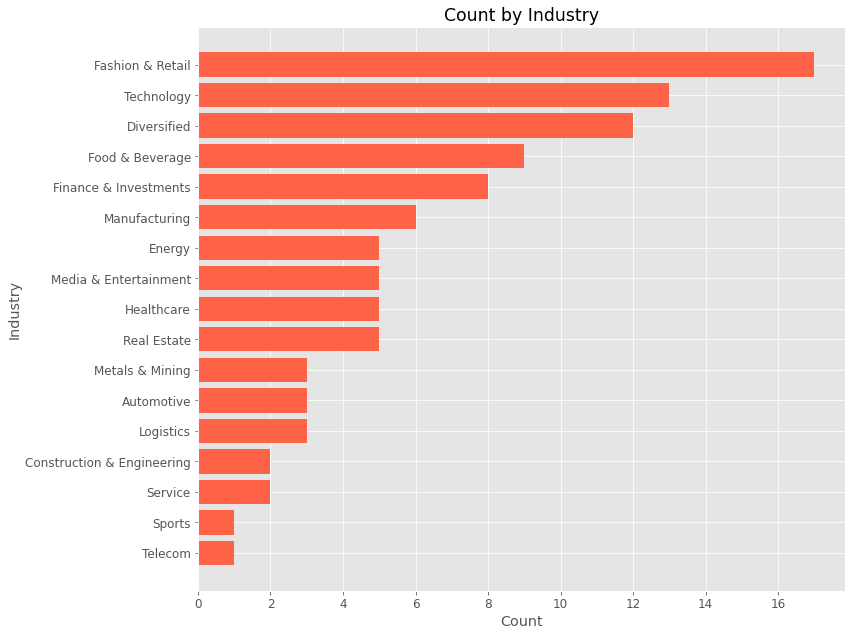

In [12]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Industry'].value_counts().keys(), width=df['Industry'].value_counts().values, color='tomato', align='center')
ax.set(title='Count by Industry', xlabel='Count', ylabel='Industry')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [13]:
df['Country'].value_counts()

United States     26
Russia            24
China             22
India              6
France             4
Spain              3
Canada             3
Germany            3
Hong Kong          3
United Kingdom     1
Singapore          1
Thailand           1
Netherlands        1
Mexico             1
Italy              1
Name: Country, dtype: int64

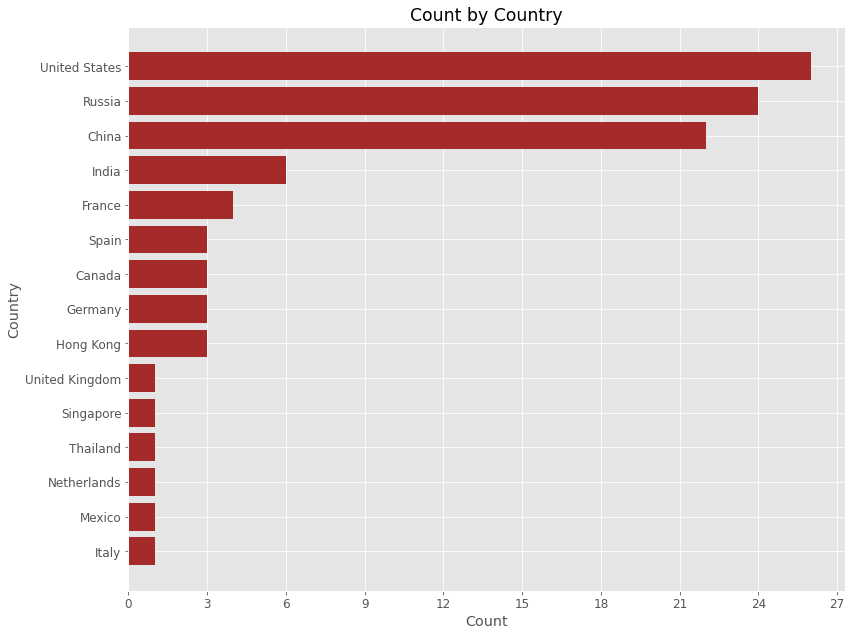

In [14]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.barh(y=df['Country'].value_counts().keys(), width=df['Country'].value_counts().values, color='brown', align='center')
ax.set(title='Count by Country', xlabel='Count', ylabel='Country')
ax.invert_yaxis()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

In [15]:
df.describe()

,RealTimeWorth
count,100.000000
mean,28010.085580
std,40435.396204
min,1000.000000
25%,1203.105500
50%,1984.688500
75%,45864.582250
max,221385.745000


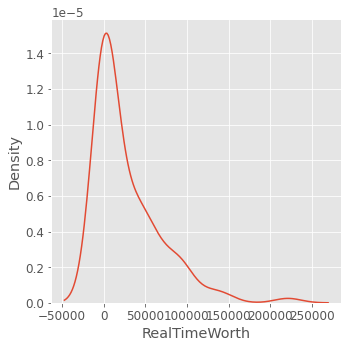

In [16]:
sns.displot(df, x='RealTimeWorth', kind='kde')

In [17]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def billion(x, pos):
  return '$%1.1fB' % (x * 1e-3)

format_bill = FuncFormatter(billion)

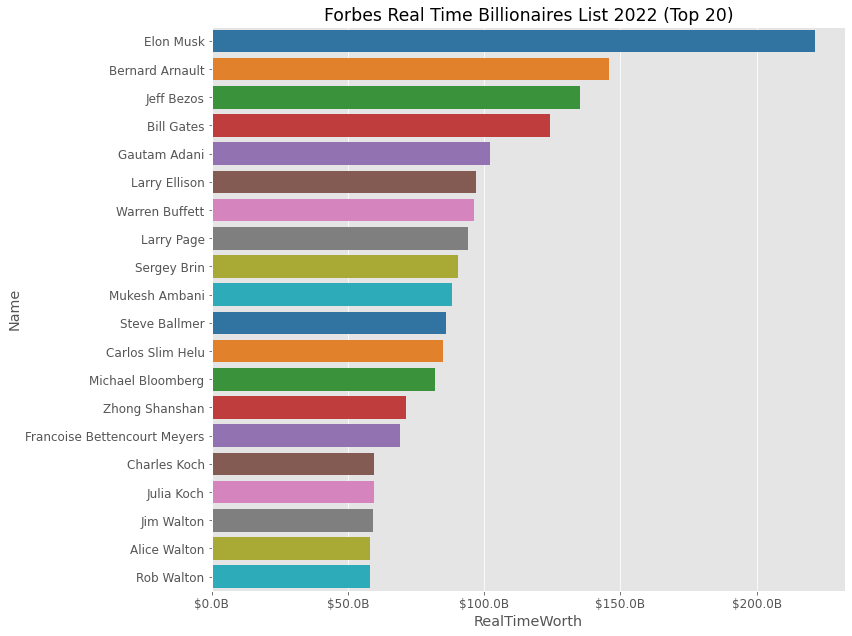

In [18]:
fig, ax = plt.subplots()
sns.barplot(
  data=df.sort_values(by='RealTimeRank', ascending=True)[:20],
  x='RealTimeWorth', y='Name',
  palette='tab10')

ax.set(title="Forbes Real Time Billionaires List 2022 (Top 20)", xlabel='RealTimeWorth', ylabel='Name')
ax.xaxis.set_major_formatter(format_bill)

# Grouping and Aggregation

In [19]:
df.groupby('Source')\
  .agg(np.sum).sort_values(by='RealTimeWorth', ascending=False)

,RealTimeWorth
Source,
"Tesla, SpaceX",221385.745
Microsoft,210045.522
Google,184577.931
Walmart,175242.652
Amazon,167711.388
...,...
"steel, investments",1025.222
"investments, real estate",1016.664
home & office products,1004.099


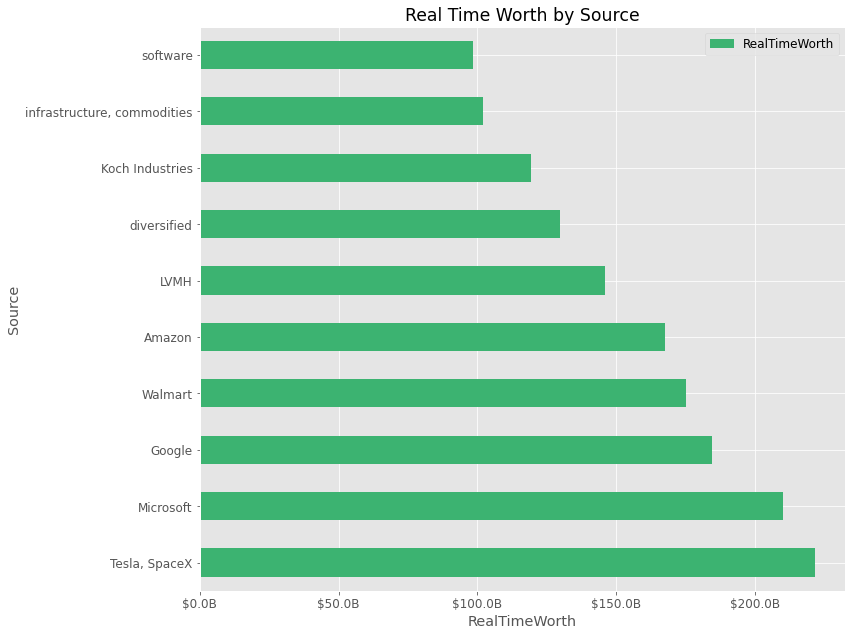

In [20]:
ax = df.groupby('Source')\
  .agg(np.sum).sort_values(by='RealTimeWorth', ascending=False)[:10]\
  .plot(kind='barh', color='mediumseagreen')\

ax.set(title='Real Time Worth by Source', xlabel='RealTimeWorth', ylabel='Source')
ax.xaxis.set_major_formatter(format_bill)